# Sklearn

### sklearn.linear_mode

In [2]:
from matplotlib.colors import ListedColormap
from sklearn import model_selection, datasets, linear_model, metrics

In [3]:
import numpy as np

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Линейная регрессия

In [5]:
data, target, coef = datasets.make_regression(n_features=2,\
                n_informative=1, n_targets=1, noise=5., coef=True,\
                                             random_state=2)

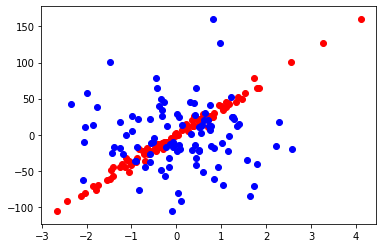

In [6]:
pylab.scatter(data[:,0], target, color = 'r')
pylab.scatter(data[:,1], target, color = 'b')

In [7]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(\
       data, target, test_size =0.3)

In [9]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(X_train, y_train)
predictions = linear_regressor.predict(X_test)

In [8]:
print(y_test)

[  1.72644759 -17.27897399 -21.47606913  12.74038341  14.76930132
 -19.36956003 -10.27758354 -84.32102748  10.33267887 -91.477377
 -16.85466265  45.05465366 -22.32195021  11.74073026  18.17188553
  21.20540389  44.66274342  41.1068411   22.2276832   11.96165156
  64.70214251 -32.71074998 -40.84204295  13.02656201 -63.4056294
 -10.29545833 -16.65927231 -27.02798161  12.47089016  12.67156468]


In [10]:
print(predictions)

[ -0.75752651 -13.84898809 -18.55291279   7.40730258   7.15730571
 -32.70070204  -8.09019232 -82.91099727   8.53235115 -94.50061551
 -16.42684476  42.21795728 -23.57308187  13.55282277  18.48416654
  15.9745301   50.63334498  36.23681079  18.47033544  13.30795786
  68.17782415 -44.37968365 -47.69072881  18.38150437 -60.4575972
 -11.45576159 -14.87736562 -25.41191406  19.43481345  13.83817482]


In [11]:
metrics.mean_absolute_error(y_test, predictions)

3.8111529429125586

In [12]:
scorer = metrics.make_scorer(metrics.mean_absolute_error,\
                             greater_is_better=True)

In [13]:
linear_scoring = model_selection.cross_val_score(\
        linear_regressor, data, target, scoring=scorer, cv=10)
print('mean: {}, std: {}'.format(linear_scoring.mean(),\
                                linear_scoring.std()))

mean: 4.070071498779696, std: 1.07371044928902


In [14]:
coef

array([38.07925837,  0.        ])

In [15]:
linear_regressor.coef_

array([38.49045025,  0.06380667])

In [16]:
linear_regressor.intercept_

-0.7925079433412163

In [17]:
print('y = {:.2f}*x1 + {:.2f}*x2'.format(coef[0], coef[1]))

y = 38.08*x1 + 0.00*x2


In [20]:
print('y = {:.2f}*x1 + {:.2f}*x2{:.2f}'.format(linear_regressor.coef_[0],
                                                 linear_regressor.coef_[1],
                                                 linear_regressor.intercept_))

y = 38.49*x1 + 0.06*x2-0.79


### Lasso

In [22]:
lasso_regressor = linear_model.Lasso(random_state=3)
lasso_regressor.fit(X_train, y_train)
lasso_predictions = lasso_regressor.predict(X_test)

In [23]:
lasso_scoring = model_selection.cross_val_score(lasso_regressor,
                                               data, target, scoring=scorer
                                               , cv=10)

In [24]:
print('mean: {}, std: {}'.format(lasso_scoring.mean(), lasso_scoring.std()))

mean: 4.1544782466663985, std: 1.0170354384993352


In [25]:
print("y = {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1]))

y = 38.08*x1 + 0.00*x2


In [26]:
print("y = {:.2f}*x1 + {:.2f}*x2".format(lasso_regressor.coef_[0], lasso_regressor.coef_[1]))

y = 37.80*x1 + 0.00*x2
